In [38]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import matplotlib.pyplot as plt

data_dir = ".\datasets\PJM_power"
fname = "COMED_hourly.csv"

# Prepare your data
data = pd.read_csv(os.path.join(data_dir, fname))
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.sort_values(by=['Datetime'], inplace=True)
data.index = data['Datetime']
data.drop('Datetime', axis=1, inplace=True)
data = data.iloc[:720,:] 
print(data.head(50))
print(data.tail(50))
# ...



                     COMED_MW
Datetime                     
2011-01-01 01:00:00    9631.0
2011-01-01 02:00:00    9273.0
2011-01-01 03:00:00    9011.0
2011-01-01 04:00:00    8741.0
2011-01-01 05:00:00    8694.0
2011-01-01 06:00:00    8711.0
2011-01-01 07:00:00    8943.0
2011-01-01 08:00:00    9222.0
2011-01-01 09:00:00    9430.0
2011-01-01 10:00:00    9670.0
2011-01-01 11:00:00   10125.0
2011-01-01 12:00:00   10538.0
2011-01-01 13:00:00   10782.0
2011-01-01 14:00:00   10861.0
2011-01-01 15:00:00   10784.0
2011-01-01 16:00:00   10928.0
2011-01-01 17:00:00   11133.0
2011-01-01 18:00:00   11924.0
2011-01-01 19:00:00   12665.0
2011-01-01 20:00:00   12701.0
2011-01-01 21:00:00   12630.0
2011-01-01 22:00:00   12513.0
2011-01-01 23:00:00   12252.0
2011-01-02 00:00:00   11778.0
2011-01-02 01:00:00   11199.0
2011-01-02 02:00:00   10682.0
2011-01-02 03:00:00   10376.0
2011-01-02 04:00:00   10247.0
2011-01-02 05:00:00   10161.0
2011-01-02 06:00:00   10220.0
2011-01-02 07:00:00   10346.0
2011-01-02

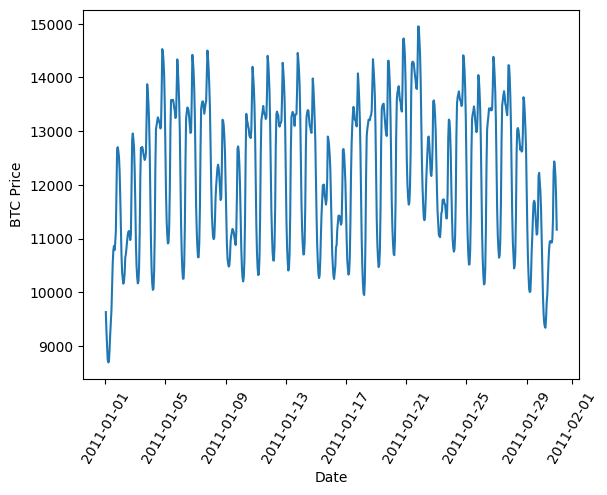

In [39]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=60)

plt.plot(data.index, data['COMED_MW'])

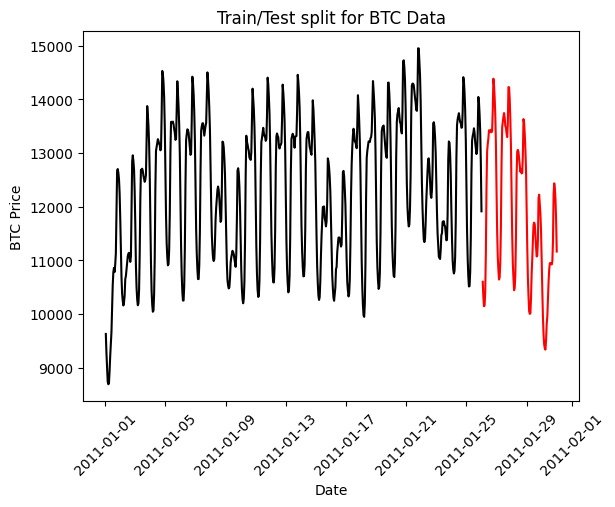

In [40]:
cutoff_date = data.index[-120]

train = data[data.index < cutoff_date]
test = data[data.index > cutoff_date]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [41]:
# Create a SARIMAX model object
p = 5
d = 2
q = 2
P = 5
D = 2
Q = 2
S = 24

model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))

# Fit the model to your data
model_fit = model.fit()

# Make predictions


c:\Users\eugen.ravariu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\eugen.ravariu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\eugen.ravariu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
y_pred = model_fit.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = model_fit.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

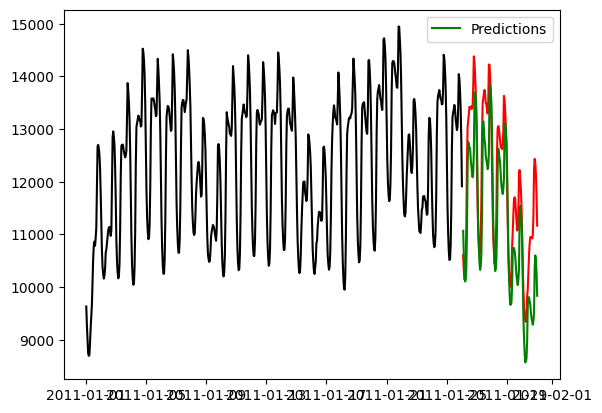

In [43]:
plt.plot(train.index, train, color='black')
plt.plot(test.index, test, color='red')
plt.plot(y_pred_df.index, y_pred_out, color='green', label = 'Predictions')
plt.legend()